# **Adult Data Checking**
- dataset 'income' imbalanced portion.
- replace object data type with labelencoder, vector representation.

In [1]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score

import os
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 12

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive//MyDrive/Table-GAN_Checking/dataset

/content/drive/MyDrive/Table-GAN_Checking/dataset


In [4]:
%ls

Adult_pra_cleaned.csv  Adult_pra_labels.csv


In [16]:
header_list = ["age","workclass","fnlwgt","education","education_num","marital-status","occupation",
               "relationship","race","sex","capital-gain","capital-loss","hours-per-week","native-country"
               ] #14 columns (14 features).
dataset = pd.read_csv('Adult_pra_cleaned.csv', names = header_list)
target = pd.read_csv('Adult_pra_labels.csv')
#print(dataset.columns) #15개 columns
#print(dataset.info())

target.columns = ['income']
print(target.head())

   income
0       0
1       0
2       0
3       0
4       0


In [20]:
dataset = pd.concat([dataset,target], axis = 1)

In [21]:
dataset['income'].unique()

array([0, 1])

In [ ]:
#dataset['income'] = dataset['income'].map(lambda x: 1 if x==' >50K' else 0)

In [22]:
print(dataset['income'].value_counts())

income
0    24720
1     7841
Name: count, dtype: int64


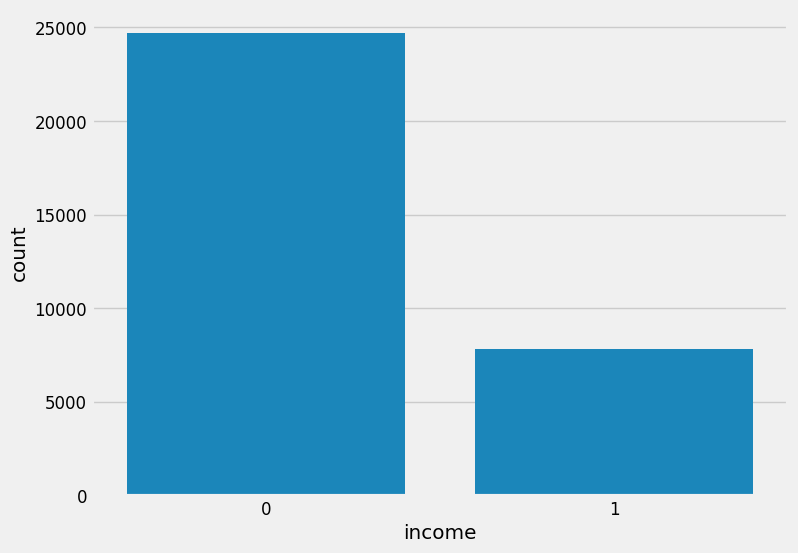

In [23]:
sns.countplot(x='income', data=dataset)
plt.show()

In [ ]:
#dataset['native-country-bin'] = dataset['native-country'].map(lambda x: 1 if x==' United-States' else 0) #column 16개

In [ ]:
#print(dataset[['native-country-bin']].value_counts())

native-country-bin
1                     29170
0                      3391
Name: count, dtype: int64


In [24]:
train_data, test_data = train_test_split(dataset, test_size = 0.2, random_state = 42, stratify = dataset['income']) #일정 비율을 지켜준다
print(train_data.shape)

(26048, 15)


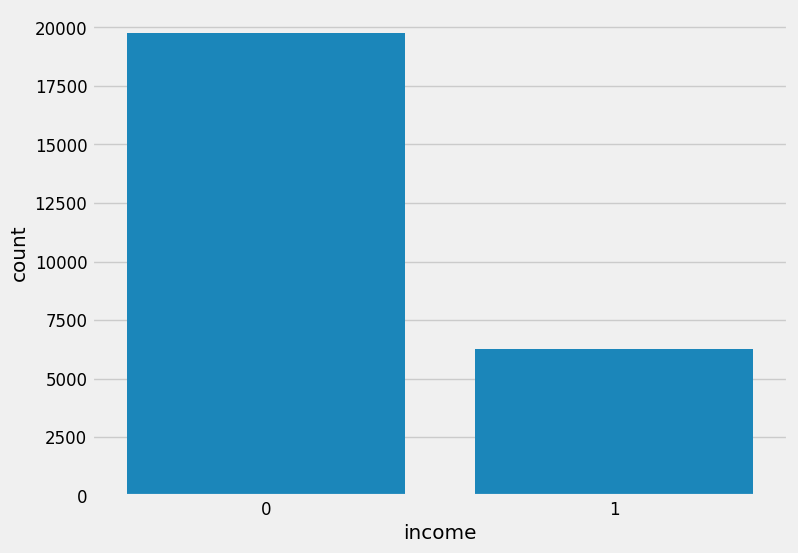

In [25]:
sns.countplot(x='income', data=train_data)
plt.show()

In [29]:
#데이터 분석 영향을 받은 경우
X = train_data.iloc[:, [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,12, 13]]
y = train_data[['income']]
"""

String_X = train_data[['workclass','education','marital-status', 'occupation','relationship','race','sex']]
encoder = LabelEncoder()
encoded_X = String_X.apply(encoder.fit_transform)

# X 데이터에 encode된 결과를 추가
X = pd.concat([X, encoded_X], axis=1)

print(X.shape)
"""

"\n\nString_X = train_data[['workclass','education','marital-status', 'occupation','relationship','race','sex']]\nencoder = LabelEncoder()\nencoded_X = String_X.apply(encoder.fit_transform)\n\n# X 데이터에 encode된 결과를 추가\nX = pd.concat([X, encoded_X], axis=1)\n\nprint(X.shape)\n"

In [30]:
#decision tree를 이용해서 어떤 feature가 제일 영향력이 있는 feature인 지 확인하기.
dt_clf = DecisionTreeClassifier(random_state=1004)

#dt_clf_model = dt_clf.fit(X,y)
cv_scores = cross_val_score(dt_clf, X,y,cv=5)
print("Cross-validation scores:", cv_scores)
print("Average accuracy:", np.mean(cv_scores))

dt_clf_model = dt_clf.fit(X,y)
print(dt_clf_model.feature_importances_)

#모델의 정확도는 80%이다.

Cross-validation scores: [0.79808061 0.81305182 0.81497121 0.81455174 0.81032828]
Average accuracy: 0.8101967324382094
[0.12637361 0.03340571 0.19663683 0.01248238 0.11936751 0.14923924
 0.05750863 0.00909644 0.01028947 0.00843926 0.15808695 0.03641627
 0.06743754 0.01522019]


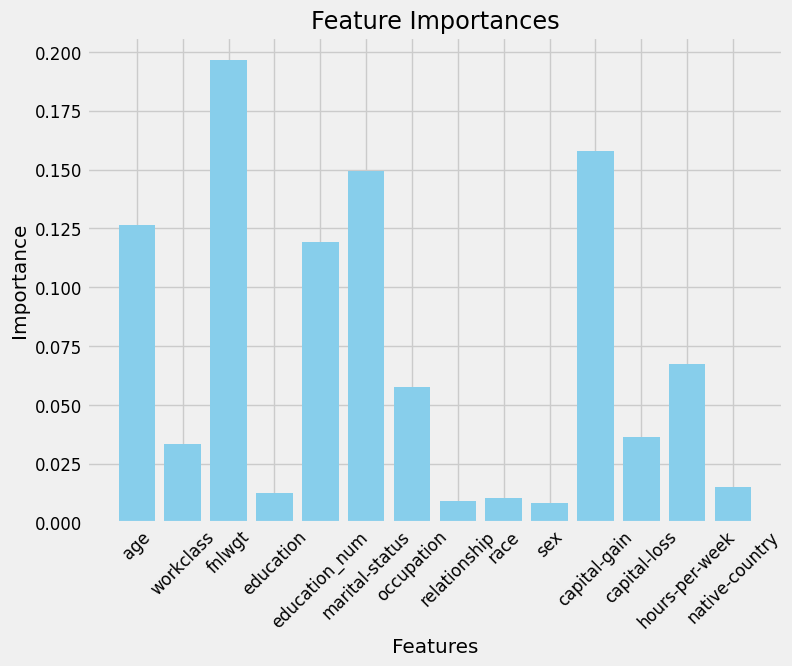

In [31]:
features = X.columns
importances = dt_clf_model.feature_importances_

plt.figure(figsize=(8, 6))
plt.bar(features, importances, color='skyblue')
plt.tick_params(axis='x', labelrotation=90)
plt.title('Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45)
plt.show()

# **Data Modeling without Table - GAN**
- Bagging
  - accuracy : 84%
  - F1 Score : 90(index : 0), 66(index : 1)
- AdaBoostClassifier
  - accuracy : 86%
  - F1 Score : 92(index : 0), 70(index : 1)
- RandomforestClassifier
  - accuracy : 85%
  - F1 Score : 91(index : 0), 67(index : 1)
- XGBClassifier
  - accuracy : 86%
  - F1 Score : 92(index : 0), 71(index : 1)
- LogisticRegression
  - accuracy : 81%
  - F1 Score : 89(index : 0), 54(index : 1)
- DecisionTreeClassifier
  - accuracy : 85%
  - F1 Score : 90(index : 0), 68(index : 1)

In [32]:
from sklearn.preprocessing import StandardScaler

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2

In [35]:
# 특성과 타겟 분리
"""
X = dataset.drop('income', axis=1)
y = dataset['income']

#LabelEncoder를 진행. 가중치가 없는 것으로 이용
String_index = []
for i, col in enumerate (X.columns):
    if X[col].dtype==object:
        String_index.append(col)

encoder = LabelEncoder()
for col in String_index:
    X[col] = encoder.fit_transform(X[col])
"""

########################추가
k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_selected = selector.fit_transform(X, y)
#######################


print(X.head())

       age  workclass  fnlwgt  education  education_num  marital-status  \
15738   32          2   37210          0             13               1   
27985   43          2  101950          3             14               0   
30673   20          5  122244          1              9               0   
9505    40          4   24763          5             10               2   
26417   24          2  113936          0             13               0   

       occupation  relationship  race  sex  capital-gain  capital-loss  \
15738           1             1     0    0             0             0   
27985           1             0     0    1             0             0   
30673          11             0     0    1             0             0   
9505            7             4     0    0          6849             0   
26417           3             3     0    0             0             0   

       hours-per-week  native-country  
15738              45               0  
27985              45   

In [36]:
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [37]:
# Function to evaluate models using GridSearchCV
def evaluate_model(model, param_grid, X_train, y_train):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    print(f'Best parameters for {model.__class__.__name__}: {grid_search.best_params_}')
    print(f'Best cross-validation score for {model.__class__.__name__}: {grid_search.best_score_}')
    return grid_search.best_estimator_

In [38]:
# BaggingClassifier 모델 학습
base_estimator = DecisionTreeClassifier(max_depth=None, min_samples_split=2, random_state=42)
bagging_model = BaggingClassifier(base_estimator, n_estimators=100, random_state=42)

bagging_model.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  n_estimators=100, random_state=42)

In [39]:
# AdaBoostClassifier
boosting_model = AdaBoostClassifier(DecisionTreeClassifier(), n_estimators=100, random_state=42)
param_grid_boosting = {
        'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0],
    'base_estimator__max_depth': [1, 2, 3]
}
boosting_model = evaluate_model(boosting_model, param_grid_boosting, X_train, y_train)

# RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
param_grid_rf = {
        'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_model = evaluate_model(rf_model, param_grid_rf, X_train, y_train)

# XGBoost
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
param_grid_xgb = {
        'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
        'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0]

}
xgb_model = evaluate_model(xgb_model, param_grid_xgb, X_train, y_train)

# LogisticRegression
lr_model = LogisticRegression(max_iter=1000, random_state=42)
param_grid_lr = {
        'C': [0.01, 0.1, 1, 10, 100]
    }
lr_model = evaluate_model(lr_model, param_grid_lr, X_train_scaled, y_train)

# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
param_grid_dt = {
        'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
dt_model = evaluate_model(dt_model, param_grid_dt, X_train, y_train)

# 반복문으로 일괄 테스트
def test_model(model, X_test, y_test, X_test_scaled=None):
    if X_test_scaled is not None:
        y_pred = model.predict(X_test_scaled)
    else:
        y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    return accuracy, report


models = {
    'Bagging': (bagging_model, None),
    'AdaBoost': (boosting_model, None),
    'Random Forest': (rf_model, None),
    'XGBoost': (xgb_model, None),
    'Logistic Regression': (lr_model, X_test_scaled),
    'Decision Tree': (dt_model, None)
}
# 반복문으로 출력방식 수정
for name, (model, scaled) in models.items():
    accuracy, report = test_model(model, X_test, y_test, X_test_scaled=scaled)
    print(f'{name} Model Accuracy: {accuracy}')
    print(f'{name} Model Classification Report:\n{report}')

Best parameters for AdaBoostClassifier: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
Best cross-validation score for AdaBoostClassifier: 0.8696612102125879
Best parameters for RandomForestClassifier: {'max_depth': 20, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
Best cross-validation score for RandomForestClassifier: 0.862030891655347
Best parameters for XGBClassifier: {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 1.0}
Best cross-validation score for XGBClassifier: 0.8706209261416475
Best parameters for LogisticRegression: {'C': 0.1}
Best cross-validation score for LogisticRegression: 0.8265188458627725
Best parameters for DecisionTreeClassifier: {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 10}
Best cross-validation score for DecisionTreeClassifier: 0.8523848034575661
Bagging Model Accuracy: 0.844337811900192
Bagging Model Classification Report:
              prec